In [68]:
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

In [69]:
%run src/data_loaders/scannet_render_loader.py

In [70]:
render_loader = UVDataLoader('data', batch_size=1, shuffle=True, num_workers=0, skip=6, training=True)

In [71]:
def show_image(image):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()

0 torch.Size([1, 2, 256, 256]) torch.Size([1, 3, 256, 256])
1 torch.Size([1, 2, 256, 256]) torch.Size([1, 3, 256, 256])
2 torch.Size([1, 2, 256, 256]) torch.Size([1, 3, 256, 256])
3 torch.Size([1, 2, 256, 256]) torch.Size([1, 3, 256, 256])


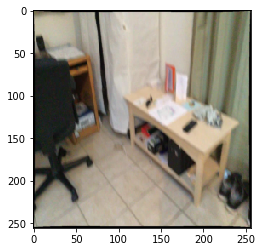

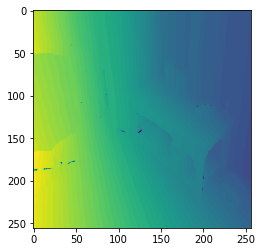

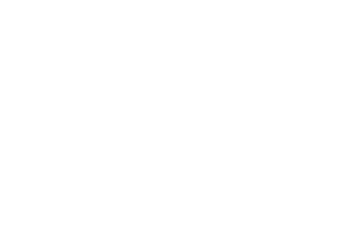

In [72]:
# Show sample of dataset
for i_batch, sample_batched in enumerate(render_loader):
    print(i_batch, sample_batched['uv'].size(),
          sample_batched['color'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_image((sample_batched['color'].numpy().transpose((0, 2, 3, 1))[0,:,:,:] + 1) / 2)
        show_image((sample_batched['uv'].numpy().transpose((0, 2, 3, 1))[0,:,:,0] + 1) / 2)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [73]:
%run src/models/rendernet.py

In [77]:
%run src/trainers/render_trainer.py


ModuleNotFoundError: No module named 'base'

In [74]:
model = DeferredNeuralRenderer(2) # TODO: Set to 16

In [75]:
lr = 1e-3
EPOCHS = 3
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [76]:
for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(render_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data['uv'], data['color']
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 5 == 4:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 5))
            running_loss = 0.0

print('Finished Training')

[1,     5] loss: 0.536


KeyboardInterrupt: 